# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

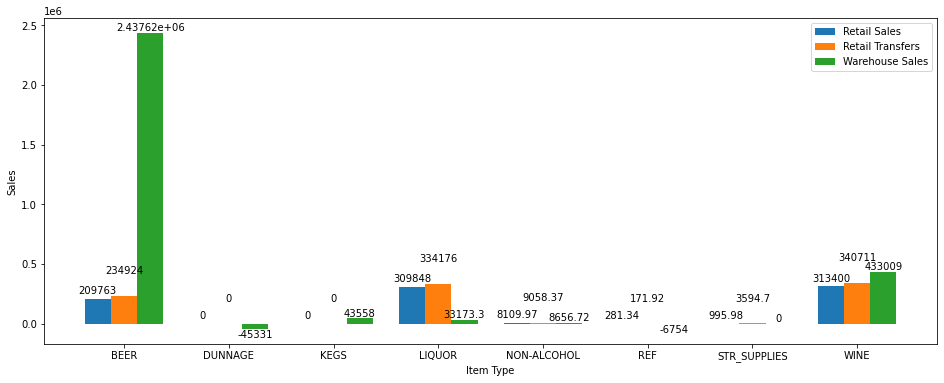

In [105]:
import numpy as np
df = data.groupby('ItemType',as_index=False).aggregate({'RetailSales':'sum','RetailTransfers':'sum','WarehouseSales':'sum'})
item = df['ItemType']
rs = df['RetailSales']
rt = df['RetailTransfers']
ws = df['WarehouseSales']
x_axis=np.arange(len(item))
width=0.25


plt.figure(figsize=(16,6))
bar1=plt.bar(x_axis-0.25,rs,width,label='Retail Sales')
bar2=plt.bar(x_axis,rt,width,label='Retail Transfers')
bar3=plt.bar(x_axis+0.25,ws,width,label='Warehouse Sales')

plt.bar_label(bar1,padding=3)
plt.bar_label(bar2,padding=20)
plt.bar_label(bar3)


plt.xlabel('Item Type')
plt.ylabel('Sales')
plt.legend()
plt.xticks(x_axis,item)
plt.show()

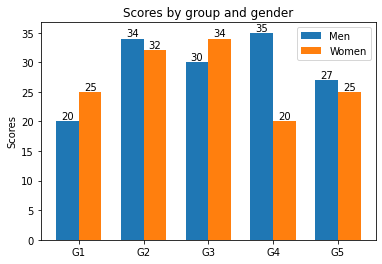

In [72]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
#fig.tight_layout()

plt.show()


## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [95]:
suppliers = data.groupby('Supplier',as_index=False).agg({'RetailSales':'max','RetailTransfers':'max','WarehouseSales':'max'}).sort_values(['RetailSales','RetailTransfers','WarehouseSales'],ascending=False).head(10)
suppliers

,Supplier,RetailSales,RetailTransfers,WarehouseSales
105,FIFTH GENERATION INC,1616.60,1587.99,244.00
69,CROWN IMPORTS,1249.00,1180.00,16271.75
139,HEINEKEN USA,851.00,777.00,9441.50
94,E & J GALLO WINERY,813.84,841.00,462.00
15,ANHEUSER BUSCH INC,768.93,813.00,6116.00
184,MILLER BREWING COMPANY,738.00,781.00,9347.97
246,SAZERAC CO,673.40,855.00,179.00
330,YUENGLING BREWERY,642.57,711.96,1775.00
41,BROWN-FORMAN BEVERAGES WORLDWIDE,641.03,642.49,210.00
25,BACARDI USA INC,520.09,563.99,312.00


[Text(0.5, 1.0, 'Top 10 supplier sales')]

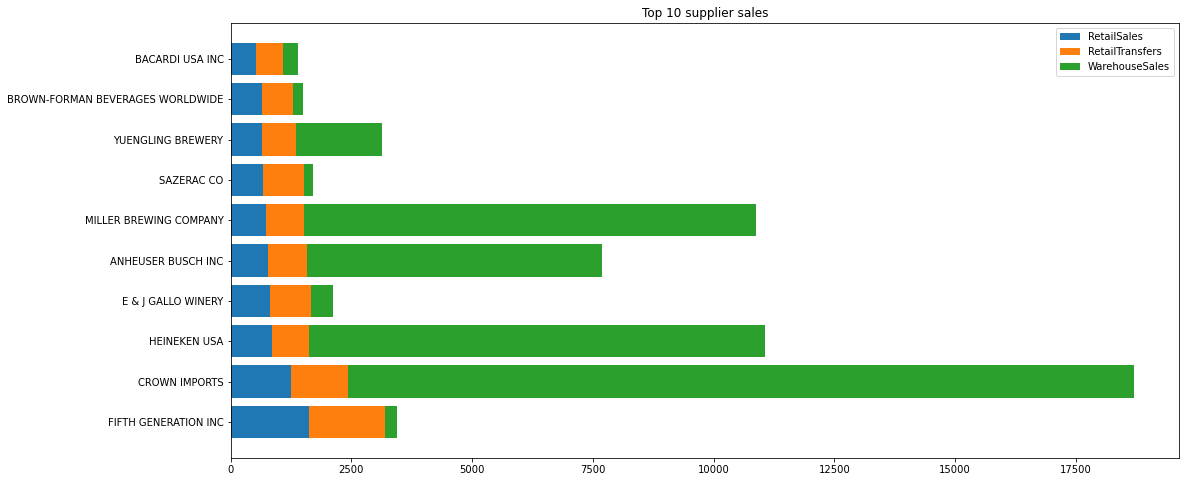

In [163]:
supplier = suppliers['Supplier']
rs = suppliers['RetailSales']
rt= suppliers['RetailTransfers']
ws = suppliers['WarehouseSales']

n=np.arange(len(supplier))
width= 0.35

fig,ax = plt.subplots(figsize=(17,8))
bar1 = ax.barh(supplier,rs,label='RetailSales')
bar2=  ax.barh(supplier,rt,left=rs,label='RetailTransfers')
bar3 = ax.barh(supplier,ws,left=rs+rt,label='WarehouseSales')
ax.legend()
ax.set(title='Top 10 supplier sales')

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

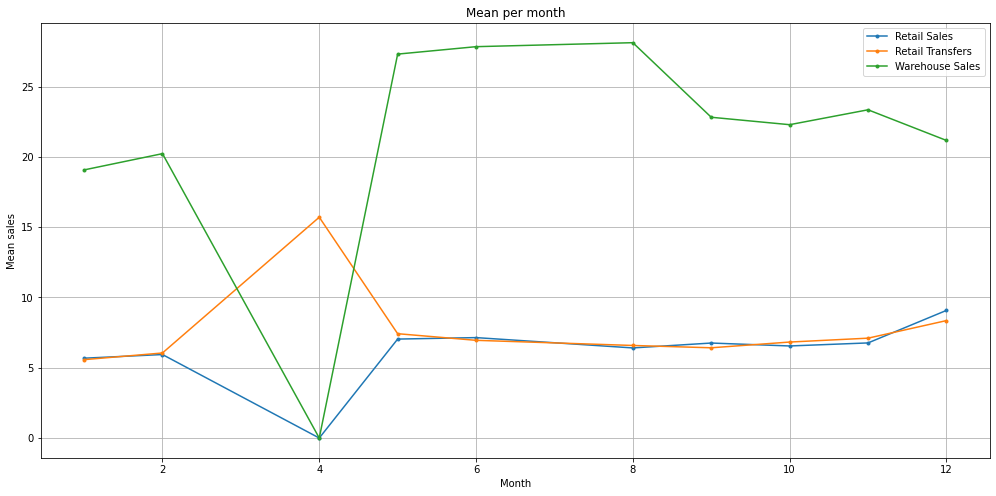

In [175]:
columns = ['RetailSales','RetailTransfers','WarehouseSales']
df3 = data.groupby('Month',as_index=False)[columns].agg('mean')

rs = df3['RetailSales']
rt= df3['RetailTransfers']
ws = df3['WarehouseSales']
month= df3['Month']

fig,ax = plt.subplots(figsize=(17,8))
line1 = ax.plot(month,rs,'.-',label='Retail Sales')
line2 = ax.plot(month,rt,'.-',label='Retail Transfers')
line3 = ax.plot(month,ws,'.-',label='Warehouse Sales')


ax.legend()
ax.set(title='Mean per month',ylabel='Mean sales',xlabel='Month')
plt.grid()
plt.show()

## 4. Plot the same information as above but as a bar chart.

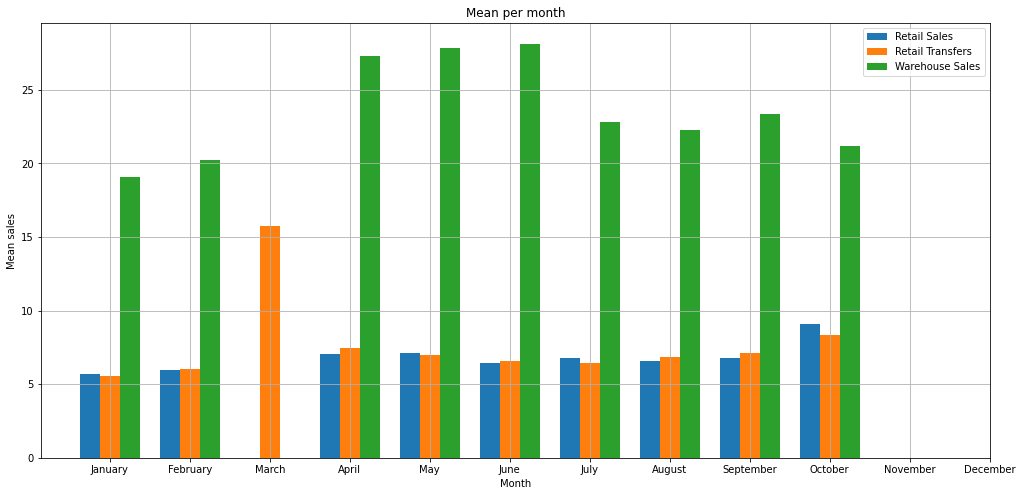

In [193]:
columns = ['RetailSales','RetailTransfers','WarehouseSales']
df3 = data.groupby('Month',as_index=False)[columns].agg('mean')

rs = df3['RetailSales']
rt= df3['RetailTransfers']
ws = df3['WarehouseSales']
month= df3['Month']
x_axis=np.arange(len(month))

fig,ax = plt.subplots(figsize=(17,8))
bar1 = ax.bar(x_axis-0.25,rs,0.25,label='Retail Sales')
bar2 = ax.bar(x_axis,rt,0.25,label='Retail Transfers')
bar3 = ax.bar(x_axis+0.25,ws,0.25,label='Warehouse Sales')


ax.legend()
ax.set(title='Mean per month',ylabel='Mean sales',xlabel='Month')
plt.grid()
plt.xticks(range(0,12),['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.show()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

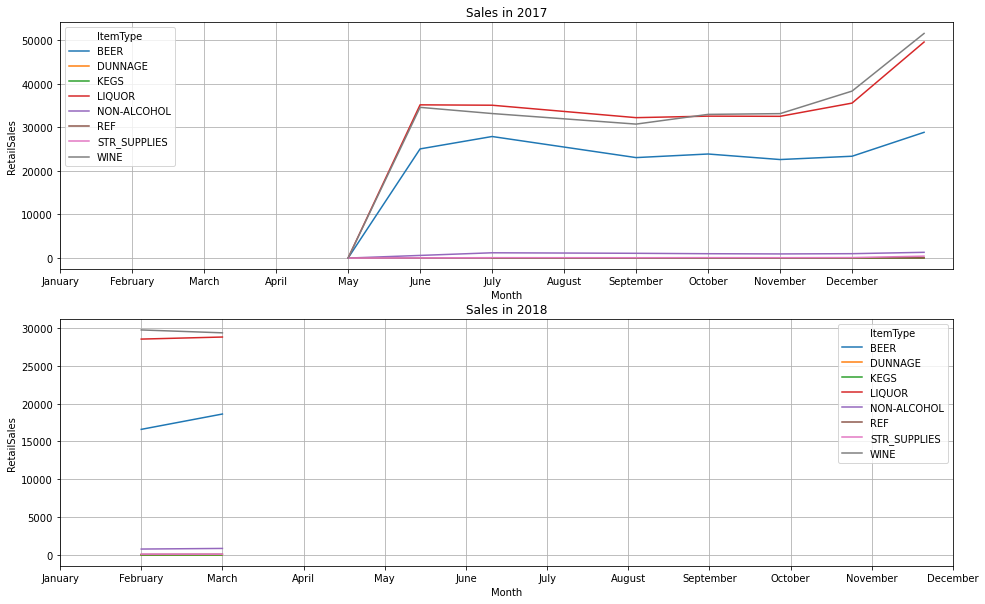

In [222]:
df4 = data.groupby(['ItemType','Year','Month'],as_index=False)[columns].sum()
year_2017 = df4[df4['Year']==2017]
year_2018 = df4[df4['Year']==2018]

fig,ax = plt.subplots(figsize=(16,10))

plt.subplot(2,1,1)
sns.lineplot(data=year_2017,x='Month',y='RetailSales',hue='ItemType')
plt.xticks(range(0,12),['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.title('Sales in 2017')
plt.grid()

plt.subplot(2,1,2)
sns.lineplot(data=year_2018,x='Month',y='RetailSales',hue='ItemType')
plt.xticks(range(0,12),['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.title('Sales in 2018')
plt.grid()


plt.show()

## 6. Plot the same information as above but as a bar chart.

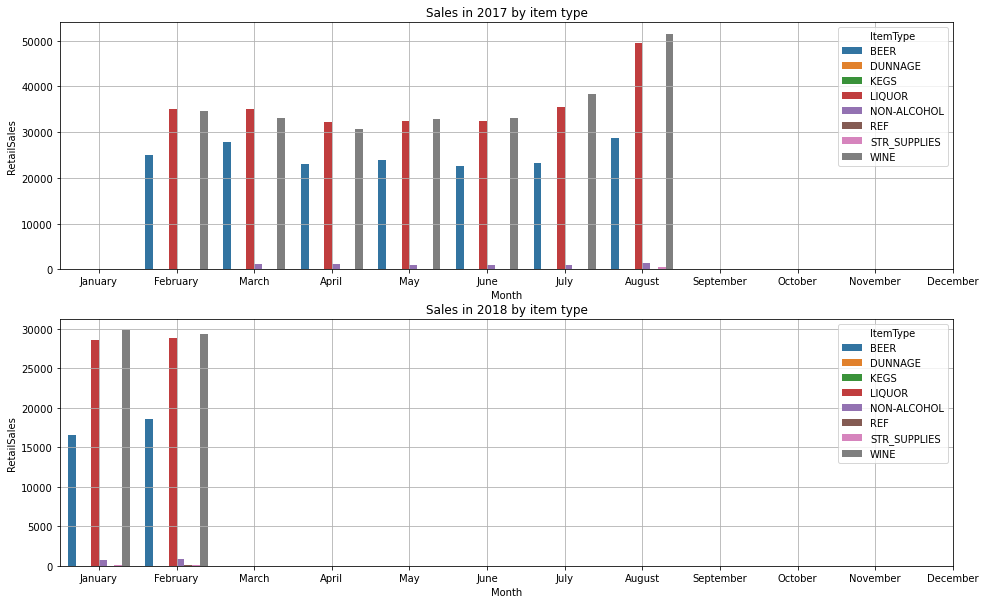

In [227]:
df4 = data.groupby(['ItemType','Year','Month'],as_index=False)[columns].sum()
year_2017 = df4[df4['Year']==2017]
year_2018 = df4[df4['Year']==2018]
palette = sns.color_palette("mako_r", 6)
fig,ax = plt.subplots(figsize=(16,10))

plt.subplot(2,1,1)
sns.barplot(data=year_2017,x='Month',y='RetailSales',hue='ItemType')
plt.xticks(range(0,12),['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.title('Sales in 2017 by item type')
plt.grid()

plt.subplot(2,1,2)
sns.barplot(data=year_2018,x='Month',y='RetailSales',hue='ItemType')
plt.xticks(range(0,12),['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.title('Sales in 2018 by item type')
plt.grid()


plt.show()

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

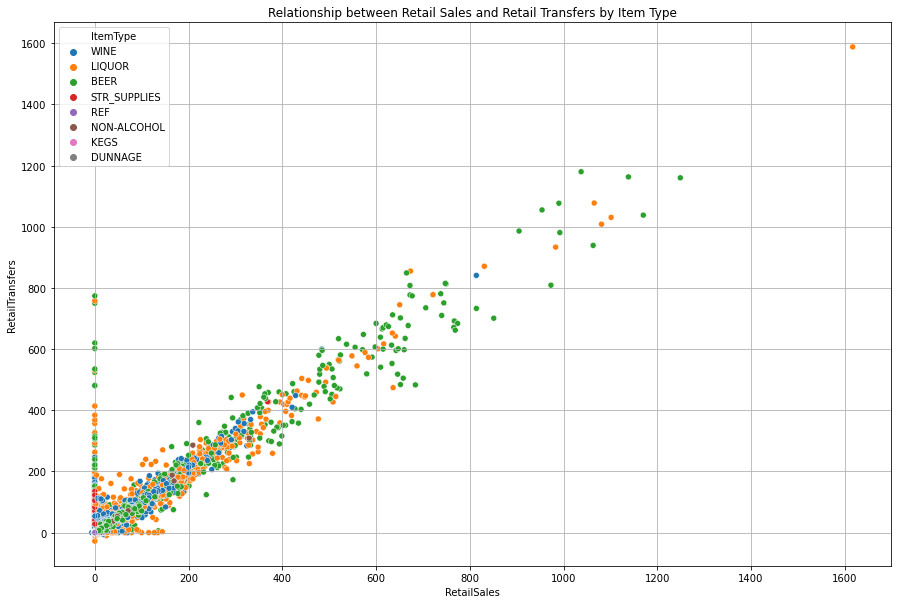

In [234]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=data,x='RetailSales',y='RetailTransfers',hue='ItemType')
plt.title('Relationship between Retail Sales and Retail Transfers by Item Type')
plt.grid()
plt.show()

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

<Figure size 1440x1152 with 0 Axes>

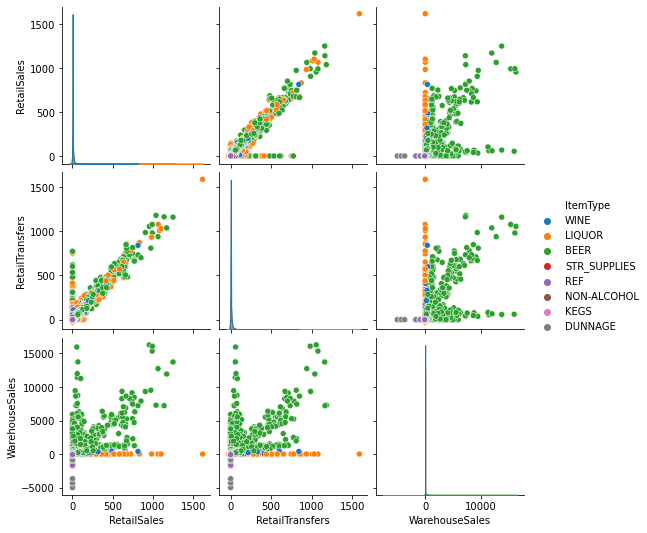

In [242]:
plt.figure(figsize=(20,16))
sns.pairplot(data=data[['ItemType','RetailSales','RetailTransfers','WarehouseSales']],hue='ItemType')
plt.grid()
plt.show()